In [1]:
# Importando as libs
import numpy as np
import pandas as pd

import datetime as dt

!pip install ipeadatapy
import ipeadatapy as ip

!pip install python-bcb
from bcb import sgs

from matplotlib import pyplot as plt
import seaborn as sns

!pip install pycaret-ts-alpha
from pycaret.time_series import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/usr/local/lib/python3.8/dist-packages/sktime/forecasting/base/_fh.py:18: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  RELATIVE_TYPES = (pd.Int64Index, pd.RangeIndex)
/usr/local/lib/python3.8/dist-packages/sktime/forecasting/base/_fh.py:19: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ABSOLUTE_TYPES = (pd.Int64Index, pd.RangeIndex, pd.DatetimeIndex, pd.PeriodIndex)
/usr/local/lib/python3.8/dist-packages/sktime/datatypes/_series/_check.py:43: FutureWarning: pa

# Nova seção

# **Os participantes do Mercado de Crédito (Empréstimos e Leasing) se dividem em Tomador x Credor, e as soluções são tanto para Pessoas Físicas quanto para Pessoas Jurídicas.**

In [2]:

# Buscando as séries de concessões de crédito no SGS (Sistema Gerenciador de Séries Temporais)
credito = sgs.get({'Pessoa Jurídica' : 20632,
                   'Pessoa Física' : 20633})
credito

,Pessoa Jurídica,Pessoa Física
Date,,
2011-03-01,125022,90632
2011-04-01,117618,86104
2011-05-01,129405,98424
2011-06-01,132130,97746
2011-07-01,126754,95593
...,...,...
2022-07-01,215298,273691
2022-08-01,241463,299453
2022-09-01,242989,286022


In [3]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141 entries, 2011-03-01 to 2022-11-01
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Pessoa Jurídica  141 non-null    int64
 1   Pessoa Física    141 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [4]:
credito.isnull().sum()


Pessoa Jurídica    0
Pessoa Física      0
dtype: int64

In [5]:
# dividir a série por 1000
credito = credito.div(1000)

# mudar o formato para long
credito_long = pd.melt(credito.reset_index(),
                     id_vars = 'Date',
                     value_vars = credito.columns,
                     var_name = 'tipo_pessoa',
                     value_name = 'values') 
credito_long

,Date,tipo_pessoa,values
0,2011-03-01,Pessoa Jurídica,125.022
1,2011-04-01,Pessoa Jurídica,117.618
2,2011-05-01,Pessoa Jurídica,129.405
3,2011-06-01,Pessoa Jurídica,132.130
4,2011-07-01,Pessoa Jurídica,126.754
...,...,...,...
277,2022-07-01,Pessoa Física,273.691
278,2022-08-01,Pessoa Física,299.453
279,2022-09-01,Pessoa Física,286.022
280,2022-10-01,Pessoa Física,282.685


In [6]:
credito_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         282 non-null    datetime64[ns]
 1   tipo_pessoa  282 non-null    object        
 2   values       282 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.7+ KB


In [7]:
# Configura o tema do gráfico
colors = ['#082a4d', '#6cbed9']

# Tamanho
theme = {'figure.figsize' : (13, 5)}

# Aplica o tema
sns.set_theme(rc = theme,
              palette = colors)

[Text(0.5, 1.0, 'Concessões mensais de crédito: PF vs. PJ'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'R$ Bilhões')]

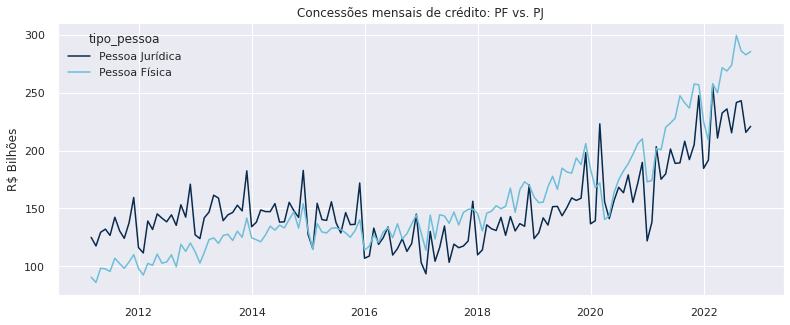

In [8]:
# Plota as concessões de crédito para PJ e PF
(
    sns.lineplot(x = 'Date',
             y = 'values',
             hue = 'tipo_pessoa',
             data = credito_long[credito_long.tipo_pessoa.isin(['Pessoa Jurídica', 'Pessoa Física'])])
    .set(title = 'Concessões mensais de crédito: PF vs. PJ',
     xlabel = '',
     ylabel = 'R$ Bilhões')
     )        

# **Podemos análisar as características de Juros e Inadimplência de crédito PF x PJ**

In [9]:
juros = sgs.get({'Juros PJ' : 20715,
                 'Juros PF' : 20716})
juros

,Juros PJ,Juros PF
Date,,
2011-03-01,19.33,36.42
2011-04-01,19.86,37.03
2011-05-01,19.84,36.89
2011-06-01,19.63,36.57
2011-07-01,19.64,36.89
...,...,...
2022-07-01,21.22,34.17
2022-08-01,18.89,34.47
2022-09-01,19.12,34.39


In [10]:
juros.isnull().sum()

Juros PJ    0
Juros PF    0
dtype: int64

In [11]:
juros_long = pd.melt(juros.reset_index(),
                     id_vars = 'Date',
                     value_vars = juros.columns,
                     var_name = 'tipopessoa',
                     value_name = 'values')
juros_long

,Date,tipopessoa,values
0,2011-03-01,Juros PJ,19.33
1,2011-04-01,Juros PJ,19.86
2,2011-05-01,Juros PJ,19.84
3,2011-06-01,Juros PJ,19.63
4,2011-07-01,Juros PJ,19.64
...,...,...,...
277,2022-07-01,Juros PF,34.17
278,2022-08-01,Juros PF,34.47
279,2022-09-01,Juros PF,34.39
280,2022-10-01,Juros PF,36.17


In [108]:
colors = ['#082a4d', '#6cbed9']

theme = {'figure.figsize' : (13, 5)}

sns.set_theme(rc = theme,
              palette = colors)

[Text(0.5, 1.0, 'Taxa a.a média de Juros PF vs. PJ'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

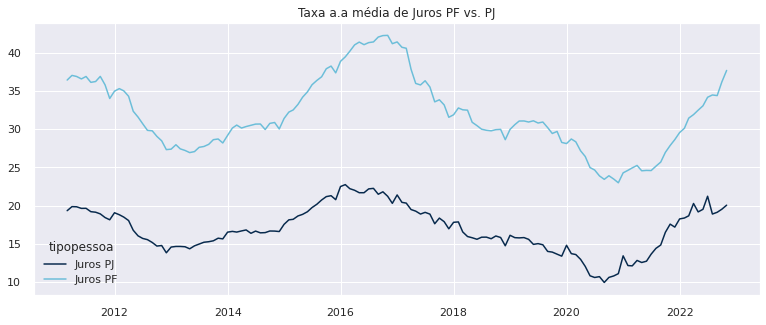

In [109]:
(
    sns.lineplot(x = 'Date',
             y = 'values',
             hue = 'tipopessoa',
             data = juros_long[juros_long.tipopessoa.isin(['Juros PJ', 'Juros PF'])])
    .set(title = 'Taxa a.a média de Juros PF vs. PJ',
     xlabel = '',
     ylabel = '')
     )   

# **Inadimplência PJ x PF**

In [14]:
inadimplencia = sgs.get({'Inadimplencia PJ' : 21083,
                 'Inadimplencia PF' : 21084})
inadimplencia

,Inadimplencia PJ,Inadimplencia PF
Date,,
2011-03-01,1.96,4.62
2011-04-01,2.04,4.67
2011-05-01,2.15,4.82
2011-06-01,2.09,4.79
2011-07-01,2.18,4.90
...,...,...
2022-07-01,1.51,3.65
2022-08-01,1.52,3.72
2022-09-01,1.57,3.81


In [15]:
inadimplencia.isnull().sum()

Inadimplencia PJ    0
Inadimplencia PF    0
dtype: int64

In [16]:
inadimplencia_long = pd.melt(inadimplencia.reset_index(),
                     id_vars = 'Date',
                     value_vars = inadimplencia.columns,
                     var_name = 'tipopessoa',
                     value_name = 'values')
inadimplencia_long

,Date,tipopessoa,values
0,2011-03-01,Inadimplencia PJ,1.96
1,2011-04-01,Inadimplencia PJ,2.04
2,2011-05-01,Inadimplencia PJ,2.15
3,2011-06-01,Inadimplencia PJ,2.09
4,2011-07-01,Inadimplencia PJ,2.18
...,...,...,...
277,2022-07-01,Inadimplencia PF,3.65
278,2022-08-01,Inadimplencia PF,3.72
279,2022-09-01,Inadimplencia PF,3.81
280,2022-10-01,Inadimplencia PF,3.89


In [110]:
colors = ['#082a4d', '#6cbed9']


theme = {'figure.figsize' : (13, 5)}
sns.set_theme(rc = theme,
              palette = colors)

[Text(0.5, 1.0, '% de inadimplência PJ vs. PF'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

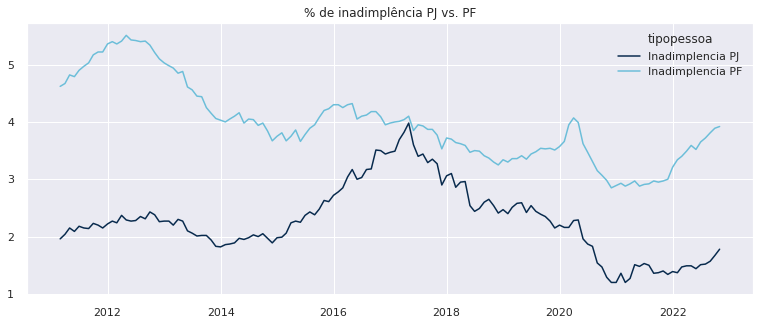

In [111]:
(
    sns.lineplot(x = 'Date',
             y = 'values',
             hue = 'tipopessoa',
             data = inadimplencia_long[inadimplencia_long.tipopessoa.isin(['Inadimplencia PJ', 'Inadimplencia PF'])])
    .set(title = '% de inadimplência PJ vs. PF',
     xlabel = '',
     ylabel = '')
     )   

# **Spread PJ vs PF**

In [19]:
spread = sgs.get({'Spread PJ' : 20784,
                 'Spread PF' : 20785})
spread

,Spread PJ,Spread PF
Date,,
2011-03-01,10.22,26.06
2011-04-01,10.72,26.66
2011-05-01,10.72,26.49
2011-06-01,10.50,26.30
2011-07-01,10.39,26.34
...,...,...
2022-07-01,9.74,23.67
2022-08-01,8.69,24.45
2022-09-01,9.04,24.61


In [20]:
spread.isnull().sum()


Spread PJ    0
Spread PF    0
dtype: int64

In [21]:
spread_long = pd.melt(spread.reset_index(),
                     id_vars = 'Date',
                     value_vars = spread.columns,
                     var_name = 'tipopessoa',
                     value_name = 'values')
spread_long

,Date,tipopessoa,values
0,2011-03-01,Spread PJ,10.22
1,2011-04-01,Spread PJ,10.72
2,2011-05-01,Spread PJ,10.72
3,2011-06-01,Spread PJ,10.50
4,2011-07-01,Spread PJ,10.39
...,...,...,...
277,2022-07-01,Spread PF,23.67
278,2022-08-01,Spread PF,24.45
279,2022-09-01,Spread PF,24.61
280,2022-10-01,Spread PF,26.49


In [112]:
colors = ['#082a4d', '#6cbed9']

theme = {'figure.figsize' : (13, 5)}

sns.set_theme(rc = theme,
              palette = colors)

[Text(0.5, 1.0, '% de Spread médio PJ vs. PF'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

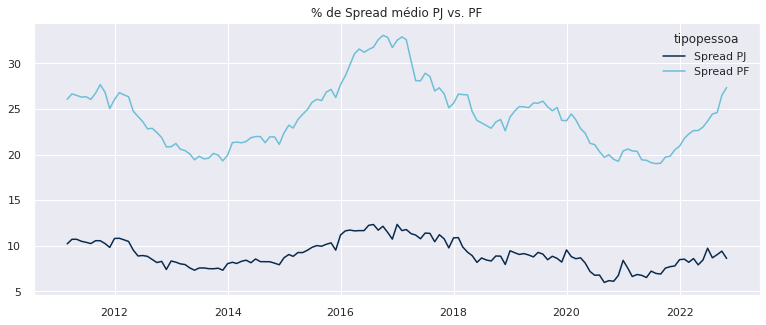

In [113]:
(
    sns.lineplot(x = 'Date',
             y = 'values',
             hue = 'tipopessoa',
             data = spread_long[spread_long.tipopessoa.isin(['Spread PJ', 'Spread PF'])])
    .set(title = '% de Spread médio PJ vs. PF',
     xlabel = '',
     ylabel = '')
     )   

# **Análisando os bancos especialistas em Financiamentos**

In [24]:
def formatar(valor):
    return "{:,.2f}".format(valor)
df = pd.read_csv('/content/ConsolidadoEstban.CSV', sep=';', encoding='utf-8')
df

,#DATA_BASE,UF,CODMUN,MUNICIPIO,CNPJ,NOME_INSTITUICAO,AGEN_ESPERADAS,AGEN_PROCESSADAS,VERBETE_110_DISPONIBILIDADES,VERBETE_111_CAIXA,...,VERBETE_470_INST_FINANCEIROS_DERIVATIVOS,VERBETE_480_OBRIGACOES_POR_RECEBIMENTO,VERBETE_481_IOF + VERBETE_482_CONTRIBUICOES_PREVIDENCIARIAS + VERBETE_483_TRIBUTOS_ESTAD_E_MUNICIPAIS + VERBETE_484_TRIBUTOS_FEDERAIS + VERBETE_485_FGTS + VERBETE_487_DEMAIS_RECEBIMENTOS,VERBETE_490_CHEQUES_ADMINISTRATIVOS + VERBETE_500_OUTRAS_OBRIGACOES,VERBETE_610_PATRIMONIO_LIQUIDO,VERBETE_710_CONTAS_DE_RESULTADO,VERBETE_711_CONTAS_CREDORAS,VERBETE_712_CONTAS_DEVEDORAS,VERBETE_899_TOTAL_DO_PASSIVO,CODMUN_IBGE
0,01/10/2022,AC,5184,MANOEL URBANO,360305,CAIXA ECONOMICA FEDERAL,1,1,"1,398,679",0,...,"512,737","12,835,936",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200344
1,01/10/2022,AC,9465,ASSIS BRASIL,360305,CAIXA ECONOMICA FEDERAL,1,1,"1,033,053",0,...,"364,334","5,333,070",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200054
2,01/10/2022,AC,15978,FEIJO,360305,CAIXA ECONOMICA FEDERAL,1,1,"2,787,121",0,...,"906,422","21,087,309",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200302
3,01/10/2022,AC,15978,FEIJO,4902979,BCO DA AMAZONIA S.A.,1,1,"340,425",0,...,"211,237","12,769,324",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200302
4,01/10/2022,AC,18690,XAPURI,4902979,BCO DA AMAZONIA S.A.,1,1,"284,646",0,...,"212,122","32,934,066",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26894,01/08/2022,TO,45807,PALMAS,60746948,BCO BRADESCO S.A.,5,5,"6,202,145",0,...,"1,126,916","483,822,936",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1721000
26895,01/08/2022,TO,45807,PALMAS,61186680,BCO BMG S.A.,1,1,"40,545",0,...,"97,582","56,028,326",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1721000
26896,01/08/2022,TO,45807,PALMAS,90400888,BCO SANTANDER (BRASIL) S.A.,2,2,"1,696,790",0,...,"9,451,438","389,767,087",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1721000
26897,01/08/2022,TO,46662,LAGOA DA CONFUSAO,0,BCO DO BRASIL S.A.,1,1,"1,459,730",0,...,"290,564","111,497,944",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1711902


In [25]:
df.isnull().sum()

#DATA_BASE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   0
UF                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           0
CODMUN                                    

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26899 entries, 0 to 26898
Data columns (total 54 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                            

In [27]:
df = df[['NOME_INSTITUICAO', 'VERBETE_162_FINANCIAMENTOS']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26899 entries, 0 to 26898
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NOME_INSTITUICAO            26899 non-null  object 
 1   VERBETE_162_FINANCIAMENTOS  26899 non-null  float64
dtypes: float64(1), object(1)
memory usage: 420.4+ KB


In [28]:
df = df.groupby(['NOME_INSTITUICAO']).sum().reset_index()

In [29]:
df.head(15)

,NOME_INSTITUICAO,VERBETE_162_FINANCIAMENTOS
0,BANCO BARI S.A.,0.0
1,BANCO BRADESCARD,0.0
2,BANCO BTG PACTUAL S.A.,0.0
3,BANCO CIFRA,0.0
4,BANCO FINAXIS,0.0
5,BANCO GENIAL,0.0
6,BANCO INBURSA,0.0
7,BANCO INTER,105317778.0
8,BANCO INVESTCRED UNIBANCO S.A.,0.0
9,BANCO ITAÚ CONSIGNADO S.A.,0.0


In [30]:
df = df[df['VERBETE_162_FINANCIAMENTOS'] > 0]
df

,NOME_INSTITUICAO,VERBETE_162_FINANCIAMENTOS
7,BANCO INTER,1.053178e+08
11,BANCO MASTER,4.017298e+06
13,BANCO PAN,7.135140e+08
21,BCO AGIBANK S.A.,3.429735e+09
22,BCO ALFA S.A.,6.947803e+06
23,BCO ARBI S.A.,2.656000e+03
28,BCO BMG S.A.,1.084586e+10
33,BCO BRADESCO S.A.,1.312474e+10
41,BCO CCB BRASIL S.A.,4.412811e+07
53,BCO DIGIMAIS S.A.,1.289532e+08


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 7 to 110
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NOME_INSTITUICAO            21 non-null     object 
 1   VERBETE_162_FINANCIAMENTOS  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [32]:
df = df.nlargest(10, 'VERBETE_162_FINANCIAMENTOS')[['NOME_INSTITUICAO','VERBETE_162_FINANCIAMENTOS']]
df

,NOME_INSTITUICAO,VERBETE_162_FINANCIAMENTOS
91,BCO VOTORANTIM S.A.,2.305498e+10
101,CAIXA ECONOMICA FEDERAL,1.511990e+10
33,BCO BRADESCO S.A.,1.312474e+10
28,BCO BMG S.A.,1.084586e+10
21,BCO AGIBANK S.A.,3.429735e+09
110,ITAÚ UNIBANCO S.A.,2.638900e+09
73,BCO MERCANTIL DO BRASIL S.A.,2.275040e+09
13,BANCO PAN,7.135140e+08
75,BCO MODAL S.A.,6.695250e+08
54,BCO DO BRASIL S.A.,5.108853e+08


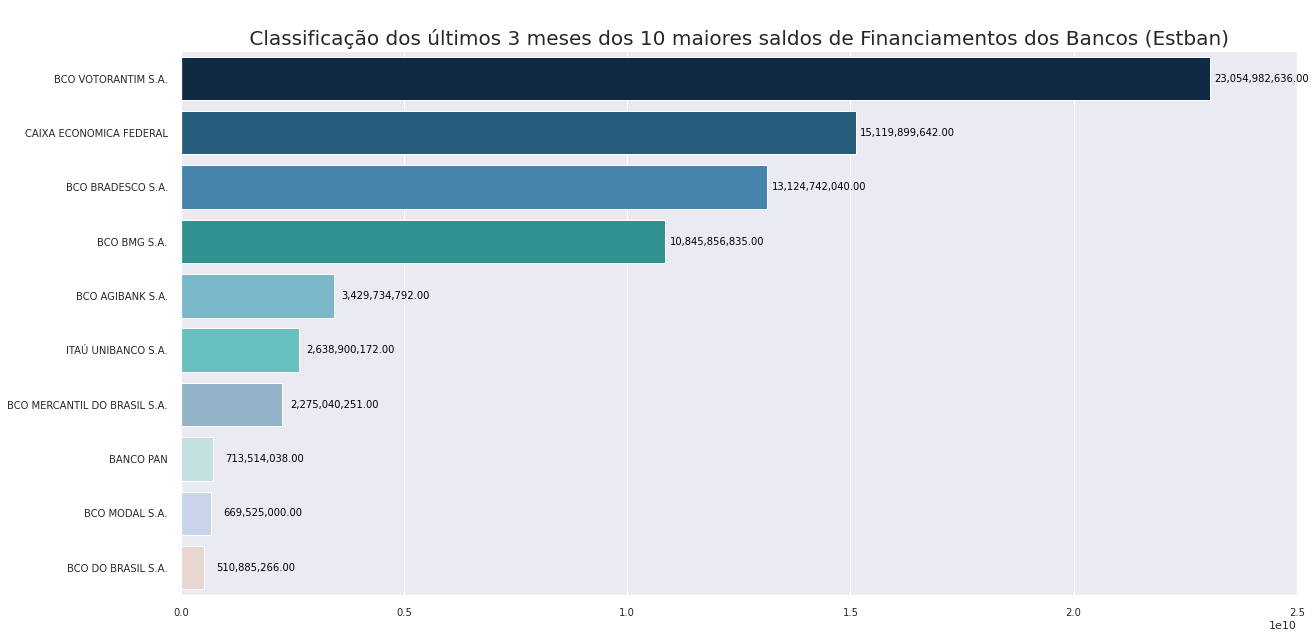

In [33]:
plt.figure(figsize=(20, 10))
colors = ['#082a4d', '#1A5F8B', '#3588BD','#21A2A2', '#6cbed9','#5ACFCF','#8AB6D1','#BEE6E6', '#C3D2F1', '#EBD5CC',]
plot = sns.barplot(y=df['NOME_INSTITUICAO'],
                   x=df['VERBETE_162_FINANCIAMENTOS'],
                   orient='h',
                   palette=colors)
for i in plot.patches:
    plot.annotate(format(i.get_width(), ',.2f'),
                  (i.get_width(), i.get_y() + i.get_height() / 2),
                  ha='center',
                  va='baseline',
                  fontsize=10,
                  color='black',
                  xytext=(52, -3),
                  textcoords='offset points')

plt.xticks([0, 5000000000, 10000000000, 15000000000, 20000000000, 25000000000], size=10)
plt.yticks(size=10)
plt.xlabel('')
plt.ylabel('')
plt.title('\n Classificação dos últimos 3 meses dos 10 maiores saldos de Financiamentos dos Bancos (Estban) ', fontsize=20)
plt.show()

# **Bancos que se destacaram nos últimos tempos (RECEITA OPERACIONAL)**

In [34]:
df = pd.read_csv('/content/202210BANCOS.CSV', sep=';', encoding='UTF-8')
df

,#DATA_BASE,DOCUMENTO,CNPJ,AGENCIA,NOME_INSTITUICAO,COD_CONGL,NOME_CONGL,TAXONOMIA,CONTA,NOME_CONTA,SALDO
0,202210,4010,0,NaN,BCO DO BRASIL S.A.,NaN,NaN,BANCO DO BRASIL - BANCO MULTIPLO,10000007,ATIVO REALIZÁVEL,2000206371079
1,202210,4010,0,NaN,BCO DO BRASIL S.A.,NaN,NaN,BANCO DO BRASIL - BANCO MULTIPLO,11000006,DISPONIBILIDADES,16786730859
2,202210,4010,0,NaN,BCO DO BRASIL S.A.,NaN,NaN,BANCO DO BRASIL - BANCO MULTIPLO,11100009,Caixa,11680212986
3,202210,4010,0,NaN,BCO DO BRASIL S.A.,NaN,NaN,BANCO DO BRASIL - BANCO MULTIPLO,11300005,Reservas Livres,2882556094
4,202210,4010,0,NaN,BCO DO BRASIL S.A.,NaN,NaN,BANCO DO BRASIL - BANCO MULTIPLO,11500001,Disponibilidades em Moedas Estrangeiras,2223961779
...,...,...,...,...,...,...,...,...,...,...,...
50241,202208,4010,92894922,NaN,BANCO ORIGINAL,NaN,NaN,BANCOS MULTIPLOS,90800007,Contratos,474529732
50242,202208,4010,92894922,NaN,BANCO ORIGINAL,NaN,NaN,BANCOS MULTIPLOS,90900000,Controle,14329359776
50243,202208,4010,92894922,NaN,BANCO ORIGINAL,NaN,NaN,BANCOS MULTIPLOS,91000002,CLASSIFICAÇÃO DA CARTEIRA DE CRÉDITOS,17331337204
50244,202208,4010,92894922,NaN,BANCO ORIGINAL,NaN,NaN,BANCOS MULTIPLOS,91100005,Operações de Créditos e Arrendamento Mercantil,17331337204


In [35]:
df.isnull().sum()

#DATA_BASE              0
DOCUMENTO               0
CNPJ                    0
AGENCIA             50246
NOME_INSTITUICAO        0
COD_CONGL           50246
NOME_CONGL          50246
TAXONOMIA               0
CONTA                   0
NOME_CONTA              0
SALDO                   0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50246 entries, 0 to 50245
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #DATA_BASE        50246 non-null  int64  
 1   DOCUMENTO         50246 non-null  int64  
 2   CNPJ              50246 non-null  int64  
 3   AGENCIA           0 non-null      float64
 4   NOME_INSTITUICAO  50246 non-null  object 
 5   COD_CONGL         0 non-null      float64
 6   NOME_CONGL        0 non-null      float64
 7   TAXONOMIA         50246 non-null  object 
 8   CONTA             50246 non-null  int64  
 9   NOME_CONTA        50246 non-null  object 
 10  SALDO             50246 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.2+ MB


In [37]:
f_receitas = df['NOME_CONTA'] == 'RECEITAS OPERACIONAIS'
df = df[f_receitas]

In [38]:
df = df[['NOME_INSTITUICAO', 'NOME_CONTA', 'SALDO']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 110 to 50211
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NOME_INSTITUICAO  526 non-null    object
 1   NOME_CONTA        526 non-null    object
 2   SALDO             526 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.4+ KB


In [39]:
df = df.groupby(['NOME_INSTITUICAO', 'NOME_CONTA']).sum().reset_index()
df

,NOME_INSTITUICAO,NOME_CONTA,SALDO
0,BANCO BARI S.A.,RECEITAS OPERACIONAIS,150604859
1,BANCO BESA S.A.,RECEITAS OPERACIONAIS,953208971
2,BANCO BRADESCARD,RECEITAS OPERACIONAIS,3529115043
3,BANCO BTG PACTUAL S.A.,RECEITAS OPERACIONAIS,174740319140
4,BANCO CIFRA,RECEITAS OPERACIONAIS,73283049
...,...,...,...
172,SOCIAL BANK S/A,RECEITAS OPERACIONAIS,5432278
173,STATE STREET BR S.A. BCO COMERCIAL,RECEITAS OPERACIONAIS,1937058127
174,STONEX BANCO DE CÂMBIO S.A.,RECEITAS OPERACIONAIS,84624880
175,TRAVELEX BANCO DE CÂMBIO S.A.,RECEITAS OPERACIONAIS,2277010918


In [40]:
df = df.nlargest(10, 'SALDO')[['NOME_INSTITUICAO', 'NOME_CONTA','SALDO']]
df

,NOME_INSTITUICAO,NOME_CONTA,SALDO
120,BCO SANTANDER (BRASIL) S.A.,RECEITAS OPERACIONAIS,503871547972
49,BCO BRADESCO S.A.,RECEITAS OPERACIONAIS,331660729962
160,ITAÚ UNIBANCO S.A.,RECEITAS OPERACIONAIS,287929670510
75,BCO DO BRASIL S.A.,RECEITAS OPERACIONAIS,274591145356
147,CAIXA ECONOMICA FEDERAL,RECEITAS OPERACIONAIS,192447696935
3,BANCO BTG PACTUAL S.A.,RECEITAS OPERACIONAIS,174740319140
92,BCO J.P. MORGAN S.A.,RECEITAS OPERACIONAIS,165284112306
119,BCO SAFRA S.A.,RECEITAS OPERACIONAIS,143838204513
142,BNDES,RECEITAS OPERACIONAIS,85237862066
61,BCO CITIBANK S.A.,RECEITAS OPERACIONAIS,84510147002


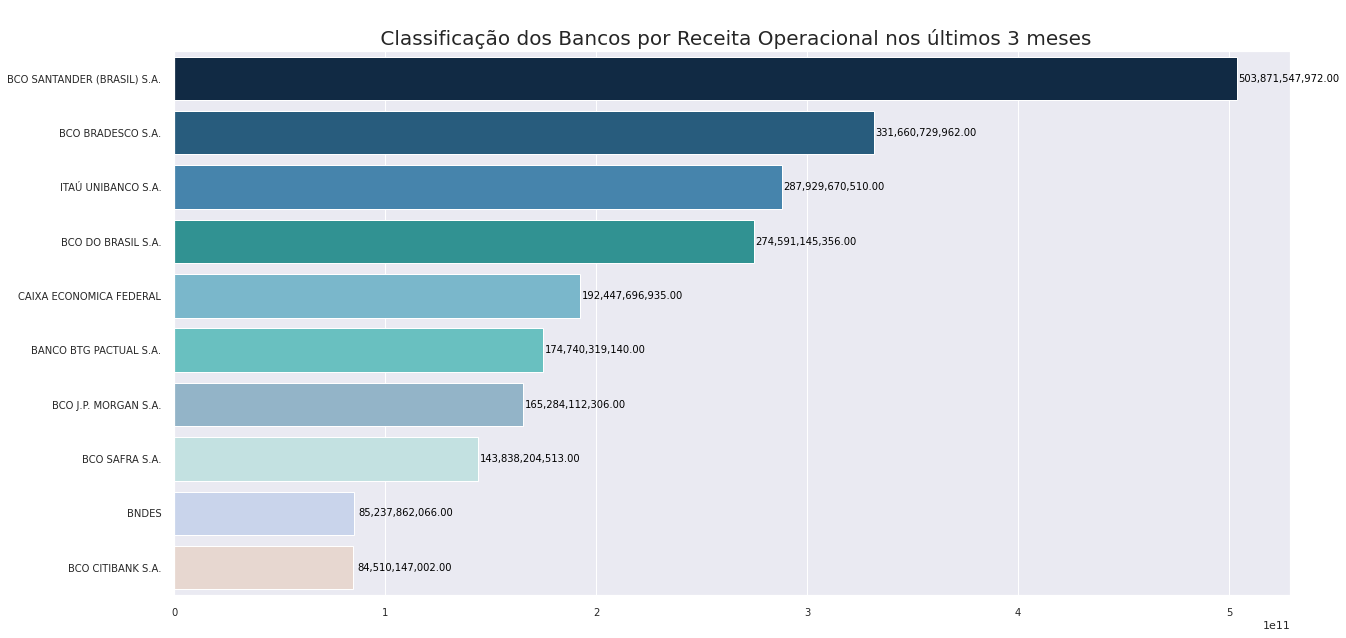

In [41]:
plt.figure(figsize=(20, 10))
colors = ['#082a4d', '#1A5F8B', '#3588BD','#21A2A2', '#6cbed9','#5ACFCF','#8AB6D1','#BEE6E6', '#C3D2F1', '#EBD5CC',]
plot = sns.barplot(y=df['NOME_INSTITUICAO'],
                   x=df['SALDO'],
                   orient='h',
                   palette=colors)
for i in plot.patches:
    plot.annotate(format(i.get_width(), ',.2f'),
                  (i.get_width(), i.get_y() + i.get_height() / 2),
                  ha='center',
                  va='baseline',
                  fontsize=10,
                  color='black',
                  xytext=(52, -3),
                  textcoords='offset points')

plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('')
plt.ylabel('')
plt.title('\n Classificação dos Bancos por Receita Operacional nos últimos 3 meses', fontsize=20)
plt.show()

# **Agrupando os Principais Bancos por Carteira de Crédito (PF x PJ) - 2022 até Setembro**

In [42]:
df = pd.read_csv('/content/CarteiraConsolidada2022.csv', sep=';', encoding='UTF-8')
df

,Instituição_financeira,Total_Carteira_ PJ,Total_Carteira_PF,Total_Geral,%_Carteira_PJ,%_Carteira_PF,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ABC-BRASIL,24829205,492619,25321824,98.05,1.945433,NaN,NaN,NaN,NaN
1,ABC-BRASIL,23632136,480364,24112500,98.01,1.992178,NaN,NaN,NaN,NaN
2,ABC-BRASIL,22340852,554808,22895660,97.58,2.423202,NaN,NaN,NaN,NaN
3,ACCREDITO - SOCIEDADE DE CRÉDITO DIRETO S.A.,35,0,35,100.00,0.000000,NaN,NaN,NaN,NaN
4,ACCREDITO - SOCIEDADE DE CRÉDITO DIRETO S.A.,28948,0,28948,100.00,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3352,"ZEMA CRÉDITO, FINANCIAMENTO E INVESTIMENTO S/A",7275,671571,678846,1.07,98.928328,NaN,NaN,NaN,NaN
3353,"ZEMA CRÉDITO, FINANCIAMENTO E INVESTIMENTO S/A",8122,684099,692221,1.17,98.826675,NaN,NaN,NaN,NaN
3354,ZIPDIN SOLUÇÕES DIGITAIS SOCIEDADE DE CRÉDITO ...,0,856,856,0.00,100.000000,NaN,NaN,NaN,NaN
3355,ZIPDIN SOLUÇÕES DIGITAIS SOCIEDADE DE CRÉDITO ...,0,2028,2028,0.00,100.000000,NaN,NaN,NaN,NaN


In [43]:
df.isnull().sum()


Instituição_financeira       0
Total_Carteira_ PJ           0
Total_Carteira_PF            0
Total_Geral                  0
%_Carteira_PJ                0
%_Carteira_PF                0
Unnamed: 6                3357
Unnamed: 7                3357
Unnamed: 8                3357
Unnamed: 9                3357
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Instituição_financeira  3357 non-null   object 
 1   Total_Carteira_ PJ      3357 non-null   int64  
 2   Total_Carteira_PF       3357 non-null   int64  
 3   Total_Geral             3357 non-null   int64  
 4   %_Carteira_PJ           3357 non-null   float64
 5   %_Carteira_PF           3357 non-null   float64
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Unnamed: 9              0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 262.4+ KB


In [45]:
df = df.groupby(['Instituição_financeira']).sum().reset_index()
df

,Instituição_financeira,Total_Carteira_ PJ,Total_Carteira_PF,Total_Geral,%_Carteira_PJ,%_Carteira_PF,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ABC-BRASIL,70802193,1527791,72329984,293.64,6.360812,0.0,0.0,0.0,0.0
1,ACCREDITO - SOCIEDADE DE CRÉDITO DIRETO S.A.,52481,0,52481,300.00,0.000000,0.0,0.0,0.0,0.0
2,ACESSO SOLUÇÕES DE PAGAMENTO S.A.,0,43766,43766,0.00,300.000000,0.0,0.0,0.0,0.0
3,AGENCIA DE FOMENTO DE GOIAS S/A,280226,31413,311639,187.46,112.537661,0.0,0.0,0.0,0.0
4,AGENCIA DE FOMENTO DO AMAPA S.A.,13668,10085,23753,132.16,167.833765,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1209,VOTORANTIM,43882712,146518032,190400744,69.15,230.841862,0.0,0.0,0.0,0.0
1210,"WILL FINANCEIRA S.A. CRÉDITO, FINANCIAMENTO E ...",78,2016292,2016370,0.00,199.992104,0.0,0.0,0.0,0.0
1211,XP,16261246,39022785,55284031,87.86,212.144462,0.0,0.0,0.0,0.0
1212,"ZEMA CRÉDITO, FINANCIAMENTO E INVESTIMENTO S/A",35129,1994505,2029634,5.24,294.758801,0.0,0.0,0.0,0.0


In [46]:
df['%_Carteira_PJ'] = df['Total_Carteira_ PJ']/df['Total_Geral']*100
df

,Instituição_financeira,Total_Carteira_ PJ,Total_Carteira_PF,Total_Geral,%_Carteira_PJ,%_Carteira_PF,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ABC-BRASIL,70802193,1527791,72329984,97.887749,6.360812,0.0,0.0,0.0,0.0
1,ACCREDITO - SOCIEDADE DE CRÉDITO DIRETO S.A.,52481,0,52481,100.000000,0.000000,0.0,0.0,0.0,0.0
2,ACESSO SOLUÇÕES DE PAGAMENTO S.A.,0,43766,43766,0.000000,300.000000,0.0,0.0,0.0,0.0
3,AGENCIA DE FOMENTO DE GOIAS S/A,280226,31413,311639,89.920068,112.537661,0.0,0.0,0.0,0.0
4,AGENCIA DE FOMENTO DO AMAPA S.A.,13668,10085,23753,57.542205,167.833765,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1209,VOTORANTIM,43882712,146518032,190400744,23.047553,230.841862,0.0,0.0,0.0,0.0
1210,"WILL FINANCEIRA S.A. CRÉDITO, FINANCIAMENTO E ...",78,2016292,2016370,0.003868,199.992104,0.0,0.0,0.0,0.0
1211,XP,16261246,39022785,55284031,29.414002,212.144462,0.0,0.0,0.0,0.0
1212,"ZEMA CRÉDITO, FINANCIAMENTO E INVESTIMENTO S/A",35129,1994505,2029634,1.730805,294.758801,0.0,0.0,0.0,0.0


In [47]:
df['%_Carteira_PF'] = df['Total_Carteira_PF']/df['Total_Geral']*100
df

,Instituição_financeira,Total_Carteira_ PJ,Total_Carteira_PF,Total_Geral,%_Carteira_PJ,%_Carteira_PF,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ABC-BRASIL,70802193,1527791,72329984,97.887749,2.112251,0.0,0.0,0.0,0.0
1,ACCREDITO - SOCIEDADE DE CRÉDITO DIRETO S.A.,52481,0,52481,100.000000,0.000000,0.0,0.0,0.0,0.0
2,ACESSO SOLUÇÕES DE PAGAMENTO S.A.,0,43766,43766,0.000000,100.000000,0.0,0.0,0.0,0.0
3,AGENCIA DE FOMENTO DE GOIAS S/A,280226,31413,311639,89.920068,10.079932,0.0,0.0,0.0,0.0
4,AGENCIA DE FOMENTO DO AMAPA S.A.,13668,10085,23753,57.542205,42.457795,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1209,VOTORANTIM,43882712,146518032,190400744,23.047553,76.952447,0.0,0.0,0.0,0.0
1210,"WILL FINANCEIRA S.A. CRÉDITO, FINANCIAMENTO E ...",78,2016292,2016370,0.003868,99.996132,0.0,0.0,0.0,0.0
1211,XP,16261246,39022785,55284031,29.414002,70.585998,0.0,0.0,0.0,0.0
1212,"ZEMA CRÉDITO, FINANCIAMENTO E INVESTIMENTO S/A",35129,1994505,2029634,1.730805,98.269195,0.0,0.0,0.0,0.0


In [48]:
df = df.nlargest(8, 'Total_Geral')[['Instituição_financeira', '%_Carteira_PJ', '%_Carteira_PF']]
df

,Instituição_financeira,%_Carteira_PJ,%_Carteira_PF
123,CAIXA ECONÔMICA FEDERAL,21.666119,78.333881
1085,ITAU,50.444367,49.555633
100,BB,36.963110,63.036890
116,BRADESCO,49.613917,50.386083
1148,SANTANDER,41.773217,58.226783
108,BNDES,99.998830,0.001170
1147,SAFRA,69.985234,30.014766
121,BTG PACTUAL,64.351358,35.648642


In [49]:
# mudar o formato para long
df_long = pd.melt(df.reset_index(drop=True),
                     id_vars = 'Instituição_financeira',
                     value_vars = df.columns,
                     var_name = 'Tipo_Carteira',
                     value_name = 'values') 
df_long

,Instituição_financeira,Tipo_Carteira,values
0,CAIXA ECONÔMICA FEDERAL,%_Carteira_PJ,21.666119
1,ITAU,%_Carteira_PJ,50.444367
2,BB,%_Carteira_PJ,36.963110
3,BRADESCO,%_Carteira_PJ,49.613917
4,SANTANDER,%_Carteira_PJ,41.773217
5,BNDES,%_Carteira_PJ,99.998830
6,SAFRA,%_Carteira_PJ,69.985234
7,BTG PACTUAL,%_Carteira_PJ,64.351358
8,CAIXA ECONÔMICA FEDERAL,%_Carteira_PF,78.333881
9,ITAU,%_Carteira_PF,49.555633


In [50]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Instituição_financeira  16 non-null     object 
 1   Tipo_Carteira           16 non-null     object 
 2   values                  16 non-null     float64
dtypes: float64(1), object(2)
memory usage: 512.0+ bytes


In [51]:
# Configura o tema do gráfico
colors = ['#082a4d', '#6cbed9']

# Tamanho
theme = {'figure.figsize' : (20, 8)}

# Aplica o tema
sns.set_theme(rc = theme,
              palette = colors)

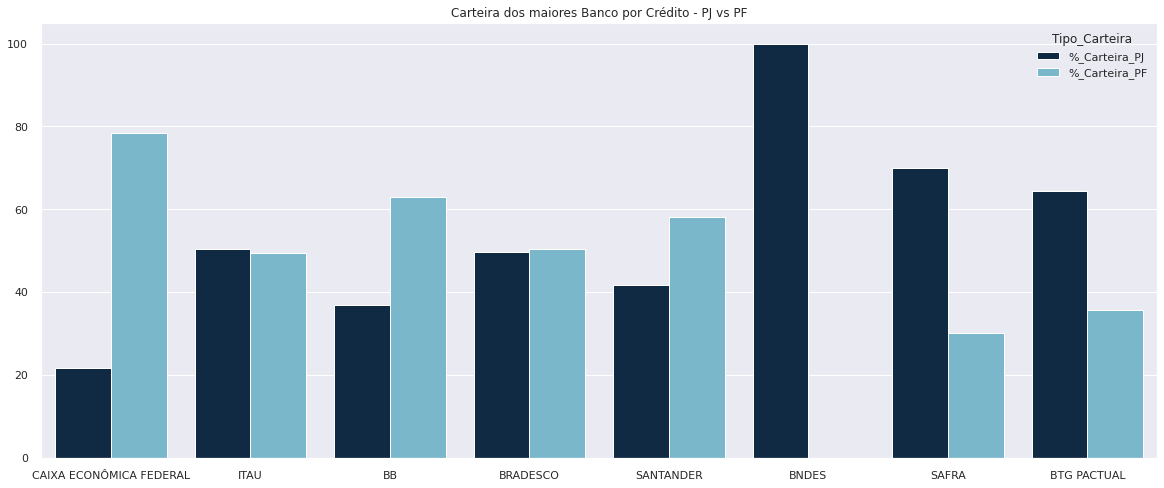

In [52]:
g = sns.barplot(x = 'Instituição_financeira',
    y = 'values',
    hue = 'Tipo_Carteira',
    data = df_long[df_long.Tipo_Carteira.isin(['%_Carteira_PJ', '%_Carteira_PF'])]).set(title = 'Carteira dos maiores Banco por Crédito - PJ vs PF',
     xlabel = '',
     ylabel = ''
     )
 


# **Prevendo o Saldo da carteira de crédito total para 2 anos**

In [53]:
# Buscando o dataset do saldo do mercado de crédito no SGS
df = sgs.get({'Saldo' : 20539 }, start='1989-01-01')
df

,Saldo
Date,
1989-01-01,0
1989-02-01,0
1989-03-01,0
1989-04-01,0
1989-05-01,0
...,...
2022-07-01,4993724
2022-08-01,5068949
2022-09-01,5161222


In [54]:
df.isnull().sum()


Saldo    0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 407 entries, 1989-01-01 to 2022-11-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Saldo   407 non-null    int64
dtypes: int64(1)
memory usage: 6.4 KB


<AxesSubplot: xlabel='Date'>

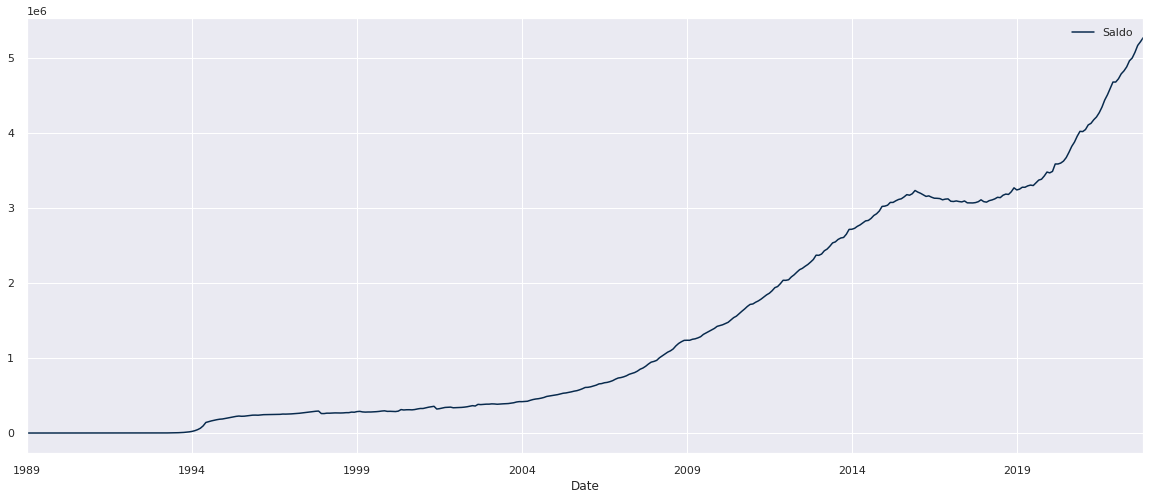

In [56]:
df.plot()

In [57]:
setup(df, fh=24, fold = 4, seasonal_period='M', session_id=123)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 7c94
INFO:logs:self.variable_keys: {'y_transformed', 'display_container', 'seasonal_period', 'X_train', 'log_plots_param', 'enforce_exogenous', 'all_sp_values', 'master_model_container', 'fold_param', 'exp_name_log', '_gpu_n_jobs_param', 'USI', 'y_train', 'fold_groups_param_full', 'exogenous_present', 'enforce_pi', 'seed', '_all_metrics', 'experiment__', 'index_type', 'gpu_param', 'seasonality_present', 'data', 'fold_generator', 'primary_sp_to_use', '_ml_usecase', 'html_param', 'strictly_positive', 'pipeline', '_all_models', 'X', 'n_jobs_param', 'X_test_transformed', 'X_test', '_all_models_internal', 'y_test_transformed', 'y_train_transformed', 'fh', 'y_test', 'logging_param', 'approach_type', '_available_plots', 'memory', 'y', 'X_train_transformed', 'idx', 'variable_keys', 'X_transformed

,Description,Value
0,session_id,123
1,Target,Saldo
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(407, 1)"
5,Train data shape,"(383, 1)"
6,Test data shape,"(24, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,4
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 1.38s...............


In [58]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,407.0
1,Summary,Statistics,Actual,Mean,,1386355.904177
2,Summary,Statistics,Actual,Median,,607023.0
3,Summary,Statistics,Actual,Standard Deviation,,1439638.237935
4,Summary,Statistics,Actual,Variance,,2072558256123.579834
5,Summary,Statistics,Actual,Kurtosis,,-0.596006
6,Summary,Statistics,Actual,Skewness,,0.837042
7,Summary,Statistics,Actual,# Distinct Values,,390.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",7899.185224
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",13142.787126


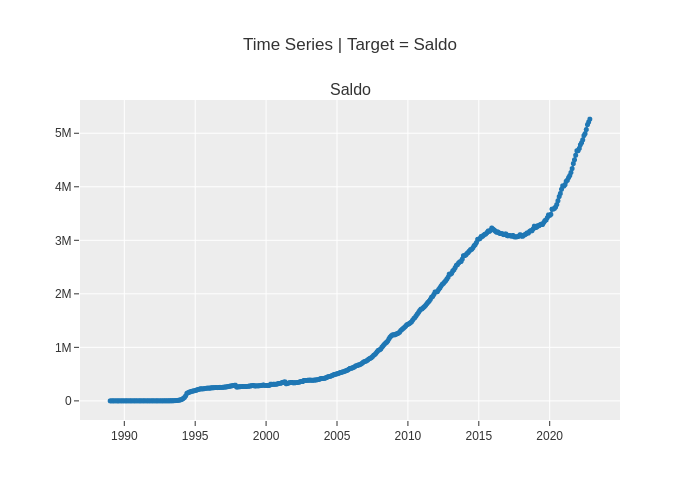

INFO:logs:Visual Rendered Successfully


In [59]:
plot_model(plot = 'ts')

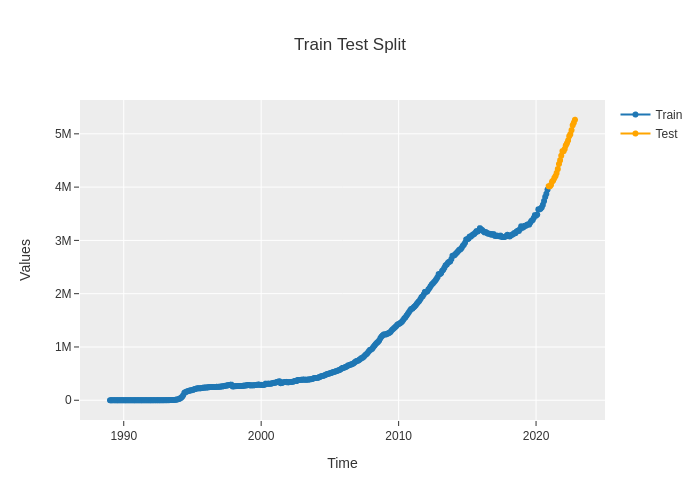

INFO:logs:Visual Rendered Successfully


In [60]:
plot_model(plot='train_test_split')

In [61]:
best_model = compare_models(exclude='auto_arima')

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,67534.3282,91171.0168,0.0211,0.0208,0.5998,0.5598,-2.0758,0.0450
ets,ETS,90473.0943,127622.5907,0.0276,0.0275,0.7954,0.7788,-4.2394,0.0950
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,94262.7872,132055.7604,0.0289,0.0291,0.8287,0.8054,-4.3563,0.0425
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,96727.5263,135549.4757,0.0297,0.03,0.8483,0.8254,-5.2989,0.0675
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,96727.5263,135549.4757,0.0297,0.03,0.8483,0.8254,-5.2989,0.0400
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,96802.6661,135560.5838,0.0298,0.03,0.8491,0.8256,-5.2571,0.0400
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,96887.5148,134124.5969,0.0298,0.0303,0.8519,0.8184,-5.0391,0.0675
exp_smooth,Exponential Smoothing,101612.6251,139118.5135,0.0311,0.0312,0.8888,0.8466,-5.7628,0.1125
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,115969.0856,147683.4279,0.0359,0.0358,1.025,0.9058,-4.6935,0.0475
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,117958.3463,159047.3696,0.0368,0.0374,1.0411,0.9726,-8.8378,0.0475


INFO:logs:master_model_container: 25
INFO:logs:display_container: 2
INFO:logs:BaseCdsDtForecaster(regressor=Lars(random_state=123), sp=12, window_length=12)
INFO:logs:compare_models() successfully completed......................................


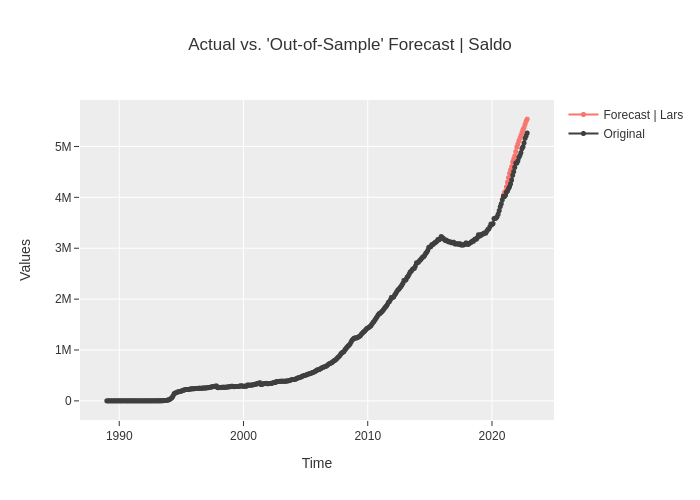

INFO:logs:Visual Rendered Successfully


In [62]:
plot_model(best_model, plot = 'forecast')

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fc77cd0aac0>, estimator=BaseCdsDtForecaster(regressor=Lars(random_state=123), sp=12, window_length=12), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing BaseCdsDtForecaster(regressor=Lars(random_state=123), sp=12, window_length=12)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fc77cd0aac0>, estimator=BaseCdsDtForecaster(regressor=Lars(random_state=123), sp=12, window_length=12), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:C

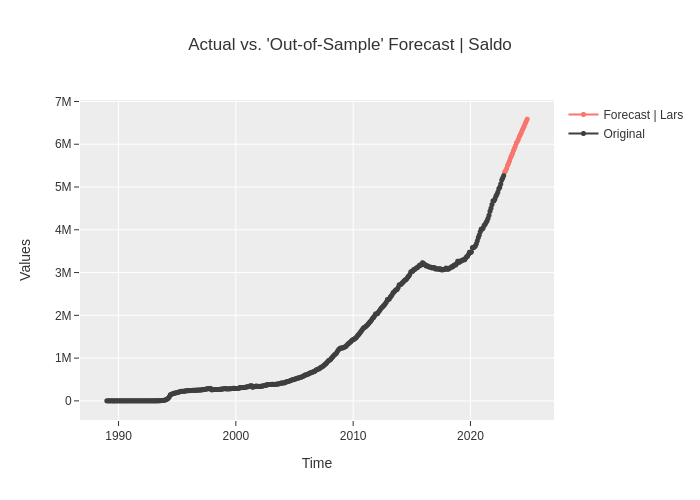

INFO:logs:Visual Rendered Successfully


In [63]:
plot_model(finalize_model(best_model), plot='forecast', data_kwargs={'fh':24});

In [64]:
predict_model(finalize_model((best_model),{'fh':[24]}))

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fc77cd0aac0>, estimator=BaseCdsDtForecaster(regressor=Lars(random_state=123), sp=12, window_length=12), fit_kwargs={'fh': [24]}, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing BaseCdsDtForecaster(regressor=Lars(random_state=123), sp=12, window_length=12)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fc77cd0aac0>, estimator=BaseCdsDtForecaster(regressor=Lars(random_state=123), sp=12, window_length=12), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={'fh': [24]}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing lib

,y_pred
2022-12,5.345052e+06
2023-01,5.381440e+06
2023-02,5.430823e+06
2023-03,5.504820e+06
2023-04,5.551824e+06
2023-05,5.610764e+06
2023-06,5.682164e+06
2023-07,5.727677e+06
2023-08,5.780188e+06
2023-09,5.850609e+06


In [65]:
previsao2024 = 6580000.00 * 1000000.00
previsao2024 

6580000000000.0

In [66]:
# 6.580.000.000.000,00

# **Classificação da Carteira de Crédito por Região**

In [67]:
df = pd.read_csv('/content/dadosregiao3.csv', sep=';', encoding='UTF-8')
df

,Instituição financeira,Código,TCB,TD,TC,SR,Segmento,Cidade,UF,Data,Total Geral,Sudeste,Centro-oeste,Nordeste,Norte,Sul,Região não Informada,Total Exterior
0,ITAU,10.069,b1,C,2,S1,199,SAO PAULO,SP,set/22,945328259,378174311,45782261,78094286,20189590,90779978,525536,331782298
1,ITAU,10.069,b1,C,2,S1,199,SAO PAULO,SP,jun/22,928476749,372414574,44032362,76348616,19504811,89018220,499485,326658682
2,ITAU,10.069,b1,C,2,S1,199,SAO PAULO,SP,mar/22,881913433,357863339,41493307,71219268,18256556,85783203,471405,306826355
3,BRADESCO,10.045,b1,C,2,S1,199,OSASCO,SP,set/22,685116616,313358896,57321991,96155353,33822137,96748775,326380,87383084
4,BRADESCO,10.045,b1,C,2,S1,199,OSASCO,SP,jun/22,670048303,311730233,55425097,92749280,32010030,95904446,316380,81912836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,CPCI - COMPANHIA DE CRÉDITO IMOBILIÁRIO S/A,87.091.716,n1,I,2,S5,31,PORTO ALEGRE,RS,mar/22,0,0,0,0,0,0,0,0
3369,"FINANSINOS S.A. CREDITO, FINANCIAMENTO E INVES...",91.669.747,n1,I,2,S5,14,NOVO HAMBURGO,RS,mar/22,0,0,0,0,0,0,0,0
3370,ING,51.073,b1,C,3,S3,199,SAO PAULO,SP,mar/22,0,0,0,0,0,0,0,0
3371,"SOLIDEZ - CORRETORA DE CÂMBIO, TÍTULOS E VALOR...",96.477.906,n2,I,2,S4,15,SAO PAULO,SP,mar/22,0,0,0,0,0,0,0,0


In [68]:
df.isnull().sum()

Instituição financeira     0
Código                     0
TCB                        0
TD                         0
TC                         0
SR                        21
Segmento                   0
Cidade                     0
UF                         0
Data                       0
Total Geral                0
Sudeste                    0
Centro-oeste               0
Nordeste                   0
Norte                      0
Sul                        0
Região não Informada       0
Total Exterior             0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Instituição financeira  3373 non-null   object
 1   Código                  3373 non-null   object
 2   TCB                     3373 non-null   object
 3   TD                      3373 non-null   object
 4   TC                      3373 non-null   int64 
 5   SR                      3352 non-null   object
 6   Segmento                3373 non-null   int64 
 7   Cidade                  3373 non-null   object
 8   UF                      3373 non-null   object
 9   Data                    3373 non-null   object
 10  Total Geral             3373 non-null   int64 
 11  Sudeste                 3373 non-null   int64 
 12  Centro-oeste            3373 non-null   int64 
 13  Nordeste                3373 non-null   int64 
 14  Norte                   3373 non-null   int64 
 15  Sul 

In [70]:
df = df.groupby(['Instituição financeira']).sum().reset_index()
df

,Instituição financeira,TC,Segmento,Total Geral,Sudeste,Centro-oeste,Nordeste,Norte,Sul,Região não Informada,Total Exterior
0,ABC-BRASIL,9,597,72329985,37010175,6238844,2902774,514363,15074340,6,10589483
1,ACCREDITO - SOCIEDADE DE CRÉDITO DIRETO S.A.,6,129,87526,87514,8,5,0,0,0,0
2,ACESSO SOLUÇÕES DE PAGAMENTO S.A.,6,123,43766,22948,3004,10297,2344,4928,246,0
3,AGENCIA DE FOMENTO DE GOIAS S/A,3,90,455167,198,454576,213,153,27,0,0
4,AGENCIA DE FOMENTO DO AMAPA S.A.,3,90,32614,60,0,26,32503,14,9,0
...,...,...,...,...,...,...,...,...,...,...,...
1216,VR,6,597,0,0,0,0,0,0,0,0
1217,"WILL FINANCEIRA S.A. CRÉDITO, FINANCIAMENTO E ...",4,28,2016370,531382,117598,1117333,100357,117022,32678,0
1218,XP,6,597,55284031,37368589,2965873,3271888,1316752,10103122,257805,0
1219,"ZEMA CRÉDITO, FINANCIAMENTO E INVESTIMENTO S/A",6,42,2029634,1500978,160194,172471,20129,168587,7275,0


In [71]:
df['Total_Sudeste'] = df['Sudeste'].sum()
df['Total_Centro_oeste'] = df['Centro-oeste'].sum()
df['Total_Nordeste'] = df['Nordeste'].sum()
df['Total_Norte'] = df['Norte'].sum()
df['Total_Sul'] = df['Sul'].sum()
df['Total_NInformada'] = df['Região não Informada'].sum()
df['Total_TotalExterior'] = df['Total Exterior'].sum()
df['Total_Geral'] = df['Total Geral'].sum()
df

,Instituição financeira,TC,Segmento,Total Geral,Sudeste,Centro-oeste,Nordeste,Norte,Sul,Região não Informada,Total Exterior,Total_Sudeste,Total_Centro_oeste,Total_Nordeste,Total_Norte,Total_Sul,Total_NInformada,Total_TotalExterior,Total_Geral
0,ABC-BRASIL,9,597,72329985,37010175,6238844,2902774,514363,15074340,6,10589483,7230484349,1833139401,2018210878,726873040,2962345767,30419897,1661343868,16463583441
1,ACCREDITO - SOCIEDADE DE CRÉDITO DIRETO S.A.,6,129,87526,87514,8,5,0,0,0,0,7230484349,1833139401,2018210878,726873040,2962345767,30419897,1661343868,16463583441
2,ACESSO SOLUÇÕES DE PAGAMENTO S.A.,6,123,43766,22948,3004,10297,2344,4928,246,0,7230484349,1833139401,2018210878,726873040,2962345767,30419897,1661343868,16463583441
3,AGENCIA DE FOMENTO DE GOIAS S/A,3,90,455167,198,454576,213,153,27,0,0,7230484349,1833139401,2018210878,726873040,2962345767,30419897,1661343868,16463583441
4,AGENCIA DE FOMENTO DO AMAPA S.A.,3,90,32614,60,0,26,32503,14,9,0,7230484349,1833139401,2018210878,726873040,2962345767,30419897,1661343868,16463583441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,VR,6,597,0,0,0,0,0,0,0,0,7230484349,1833139401,2018210878,726873040,2962345767,30419897,1661343868,16463583441
1217,"WILL FINANCEIRA S.A. CRÉDITO, FINANCIAMENTO E ...",4,28,2016370,531382,117598,1117333,100357,117022,32678,0,7230484349,1833139401,2018210878,726873040,2962345767,30419897,1661343868,16463583441
1218,XP,6,597,55284031,37368589,2965873,3271888,1316752,10103122,257805,0,7230484349,1833139401,2018210878,726873040,2962345767,30419897,1661343868,16463583441
1219,"ZEMA CRÉDITO, FINANCIAMENTO E INVESTIMENTO S/A",6,42,2029634,1500978,160194,172471,20129,168587,7275,0,7230484349,1833139401,2018210878,726873040,2962345767,30419897,1661343868,16463583441


In [72]:
df['%_Sudeste'] = df['Total_Sudeste']/df['Total_Geral']*100
df['%_Centro_oeste'] = df['Total_Centro_oeste']/df['Total_Geral']*100
df['%_Nordeste'] = df['Total_Nordeste']/df['Total_Geral']*100
df['%_Norte'] = df['Total_Norte']/df['Total_Geral']*100
df['%_Sul'] = df['Total_Sul']/df['Total_Geral']*100
df['%_NaoInfo'] = df['Total_NInformada']/df['Total_Geral']*100
df['%_Total_Exterior'] = df['Total_TotalExterior']/df['Total_Geral']*100

df

,Instituição financeira,TC,Segmento,Total Geral,Sudeste,Centro-oeste,Nordeste,Norte,Sul,Região não Informada,...,Total_NInformada,Total_TotalExterior,Total_Geral,%_Sudeste,%_Centro_oeste,%_Nordeste,%_Norte,%_Sul,%_NaoInfo,%_Total_Exterior
0,ABC-BRASIL,9,597,72329985,37010175,6238844,2902774,514363,15074340,6,...,30419897,1661343868,16463583441,43.918047,11.13451,12.258637,4.415035,17.993323,0.184771,10.091022
1,ACCREDITO - SOCIEDADE DE CRÉDITO DIRETO S.A.,6,129,87526,87514,8,5,0,0,0,...,30419897,1661343868,16463583441,43.918047,11.13451,12.258637,4.415035,17.993323,0.184771,10.091022
2,ACESSO SOLUÇÕES DE PAGAMENTO S.A.,6,123,43766,22948,3004,10297,2344,4928,246,...,30419897,1661343868,16463583441,43.918047,11.13451,12.258637,4.415035,17.993323,0.184771,10.091022
3,AGENCIA DE FOMENTO DE GOIAS S/A,3,90,455167,198,454576,213,153,27,0,...,30419897,1661343868,16463583441,43.918047,11.13451,12.258637,4.415035,17.993323,0.184771,10.091022
4,AGENCIA DE FOMENTO DO AMAPA S.A.,3,90,32614,60,0,26,32503,14,9,...,30419897,1661343868,16463583441,43.918047,11.13451,12.258637,4.415035,17.993323,0.184771,10.091022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,VR,6,597,0,0,0,0,0,0,0,...,30419897,1661343868,16463583441,43.918047,11.13451,12.258637,4.415035,17.993323,0.184771,10.091022
1217,"WILL FINANCEIRA S.A. CRÉDITO, FINANCIAMENTO E ...",4,28,2016370,531382,117598,1117333,100357,117022,32678,...,30419897,1661343868,16463583441,43.918047,11.13451,12.258637,4.415035,17.993323,0.184771,10.091022
1218,XP,6,597,55284031,37368589,2965873,3271888,1316752,10103122,257805,...,30419897,1661343868,16463583441,43.918047,11.13451,12.258637,4.415035,17.993323,0.184771,10.091022
1219,"ZEMA CRÉDITO, FINANCIAMENTO E INVESTIMENTO S/A",6,42,2029634,1500978,160194,172471,20129,168587,7275,...,30419897,1661343868,16463583441,43.918047,11.13451,12.258637,4.415035,17.993323,0.184771,10.091022


In [73]:
df = df.nlargest(8, 'Segmento')[['Segmento','%_Sudeste','%_Centro_oeste', '%_Nordeste', '%_Sul', '%_NaoInfo', '%_Total_Exterior', '%_Norte']]
df

,Segmento,%_Sudeste,%_Centro_oeste,%_Nordeste,%_Sul,%_NaoInfo,%_Total_Exterior,%_Norte
0,597,43.918047,11.13451,12.258637,17.993323,0.184771,10.091022,4.415035
8,597,43.918047,11.13451,12.258637,17.993323,0.184771,10.091022,4.415035
22,597,43.918047,11.13451,12.258637,17.993323,0.184771,10.091022,4.415035
23,597,43.918047,11.13451,12.258637,17.993323,0.184771,10.091022,4.415035
81,597,43.918047,11.13451,12.258637,17.993323,0.184771,10.091022,4.415035
94,597,43.918047,11.13451,12.258637,17.993323,0.184771,10.091022,4.415035
95,597,43.918047,11.13451,12.258637,17.993323,0.184771,10.091022,4.415035
97,597,43.918047,11.13451,12.258637,17.993323,0.184771,10.091022,4.415035


In [74]:
# mudar o formato para long
df_long = pd.melt(df.reset_index(),
                     id_vars = 'Segmento',
                     value_vars = df.columns,
                     var_name = 'Regiao',
                     value_name = 'values') 
df_long.head

<bound method NDFrame.head of     Segmento            Regiao     values
0        597         %_Sudeste  43.918047
1        597         %_Sudeste  43.918047
2        597         %_Sudeste  43.918047
3        597         %_Sudeste  43.918047
4        597         %_Sudeste  43.918047
5        597         %_Sudeste  43.918047
6        597         %_Sudeste  43.918047
7        597         %_Sudeste  43.918047
8        597    %_Centro_oeste  11.134510
9        597    %_Centro_oeste  11.134510
10       597    %_Centro_oeste  11.134510
11       597    %_Centro_oeste  11.134510
12       597    %_Centro_oeste  11.134510
13       597    %_Centro_oeste  11.134510
14       597    %_Centro_oeste  11.134510
15       597    %_Centro_oeste  11.134510
16       597        %_Nordeste  12.258637
17       597        %_Nordeste  12.258637
18       597        %_Nordeste  12.258637
19       597        %_Nordeste  12.258637
20       597        %_Nordeste  12.258637
21       597        %_Nordeste  12.258637
22  

In [75]:
df_long = df_long.groupby(['Regiao']).mean().reset_index()
df_long

,Regiao,Segmento,values
0,%_Centro_oeste,597.0,11.134510
1,%_NaoInfo,597.0,0.184771
2,%_Nordeste,597.0,12.258637
3,%_Norte,597.0,4.415035
4,%_Sudeste,597.0,43.918047
5,%_Sul,597.0,17.993323
6,%_Total_Exterior,597.0,10.091022


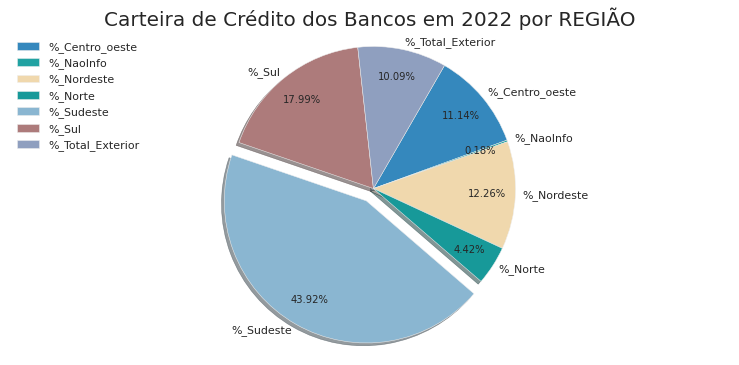

In [107]:
colors = ['#3588BD','#21A2A2', '#f0d8ad','#179999','#8AB6D1','#ad7b7b', '#8f9fbf']
plt.figure(figsize=(13, 6))

explode = [0, 0, 0, 0, 0.1, 0, 0]

plt.style.use('ggplot')
plt.title('Carteira de Crédito dos Bancos em 2022 por REGIÃO', size=20)
plt.pie(x=df_long['values'], explode=explode, labels=df_long['Regiao'], colors=colors, autopct='%.2f%%', shadow=True, startangle=60, pctdistance= 0.8, counterclock=False, labeldistance=1.05)
plt.axis('equal')

plt.legend(loc='upper left')

